### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Data_Source:`
https://grouplens.org/datasets/movielens/100k/

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

### `Hypothesis` 
- Men watch more drama than women
- Women watch more Sci-Fi than men
- Men watch more Romance than women

### `Tasks` 
- Find the number of movies per genre
- Drop the movie where the genre is unknown
- Find the movies that have more than one genre
- Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' 
- FFind the top 25 movies in terms of average ratings for movies that have been rated more than 100 times

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages - 2.5 marks

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline
from datetime import timedelta,datetime
from pandas_profiling import ProfileReport

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
#your code here
#data = pd.read_csv("Data.csv")
#item = pd.read_csv("item.csv")
#user = pd.read_csv("user.csv")

In [3]:
url_data = "http://files.grouplens.org/datasets/movielens/ml-100k/u.data"
data = pd.read_csv(url_data,sep='\t',names=['user id', 'item id', 'rating', 'timestamp'])
data.columns = ['user id', 'movie id', 'rating', 'timestamp']
print(data.shape)
data.head()

(100000, 4)


user id  movie id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596

In [4]:
url_user = "http://files.grouplens.org/datasets/movielens/ml-100k/u.user"
user = pd.read_csv(url_user,sep='|',names=['UserID','Age','Gender','Occupation','Zipcode'])
user.columns = ['user id', 'age', 'gender', 'occupation', 'zip code']
print(user.shape)
user.head()

(943, 5)


user id  age gender  occupation zip code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

In [5]:
url_item = "http://files.grouplens.org/datasets/movielens/ml-100k/u.item"
col_n = ['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
item = pd.read_csv(url_item,sep='|',encoding='latin-1',names=['movie id','movie title','release date',
               'video release date','IMDb URL',
               'unknown','Action','Adventure','Animation',
              'Children''s','Comedy','Crime','Documentary','Drama','Fantasy',
               'Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi',
              'Thriller','War','Western'])
item.drop(["video release date","IMDb URL"],axis=1,inplace=True)
item.column = col_n
print(item.shape)
item.head()

(1682, 22)


<ipython-input-5-0aededcbf323>:13: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  item.column = col_n


movie id        movie title release date  unknown  Action  Adventure  \
0         1   Toy Story (1995)  01-Jan-1995        0       0          0   
1         2   GoldenEye (1995)  01-Jan-1995        0       1          1   
2         3  Four Rooms (1995)  01-Jan-1995        0       0          0   
3         4  Get Shorty (1995)  01-Jan-1995        0       1          0   
4         5     Copycat (1995)  01-Jan-1995        0       0          0   

   Animation  Childrens  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  \
0          1          1       1      0  ...        0          0       0   
1          0          0       0      0  ...        0          0       0   
2          0          0       0      0  ...        0          0       0   
3          0          0       1      0  ...        0          0       0   
4          0          0       0      1  ...        0          0       0   

   Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0        0       0         0    0        0  
1        0        0        0       0         1    0        0  
2        0        0        0       0         1    0        0  
3        0        0        0       0         0    0        0  
4        0        0        0       0         1    0        0  

[5 rows x 22 columns]

### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

In [6]:
#your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [7]:
data.head()

user id  movie id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596

In [8]:
#Find Missing Values
data.isnull().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [9]:
data.describe().T.apply(lambda s:s.apply(lambda x:format(x,'g')))

count         mean          std          min          25%  \
user id    100000      462.485      266.614            1          254   
movie id   100000       425.53      330.798            1          175   
rating     100000      3.52986      1.12567            1            3   
timestamp  100000  8.83529e+08  5.34386e+06  8.74725e+08  8.79449e+08   

                   50%         75%          max  
user id            447         682          943  
movie id           322         631         1682  
rating               4           4            5  
timestamp  8.82827e+08  8.8826e+08  8.93287e+08

In [10]:
item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1682 non-null   int64 
 1   movie title   1682 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1682 non-null   int64 
 4   Action        1682 non-null   int64 
 5   Adventure     1682 non-null   int64 
 6   Animation     1682 non-null   int64 
 7   Childrens     1682 non-null   int64 
 8   Comedy        1682 non-null   int64 
 9   Crime         1682 non-null   int64 
 10  Documentary   1682 non-null   int64 
 11  Drama         1682 non-null   int64 
 12  Fantasy       1682 non-null   int64 
 13  Film-Noir     1682 non-null   int64 
 14  Horror        1682 non-null   int64 
 15  Musical       1682 non-null   int64 
 16  Mystery       1682 non-null   int64 
 17  Romance       1682 non-null   int64 
 18  Sci-Fi        1682 non-null   int64 
 19  Thrill

In [11]:
item.head()

movie id        movie title release date  unknown  Action  Adventure  \
0         1   Toy Story (1995)  01-Jan-1995        0       0          0   
1         2   GoldenEye (1995)  01-Jan-1995        0       1          1   
2         3  Four Rooms (1995)  01-Jan-1995        0       0          0   
3         4  Get Shorty (1995)  01-Jan-1995        0       1          0   
4         5     Copycat (1995)  01-Jan-1995        0       0          0   

   Animation  Childrens  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  \
0          1          1       1      0  ...        0          0       0   
1          0          0       0      0  ...        0          0       0   
2          0          0       0      0  ...        0          0       0   
3          0          0       1      0  ...        0          0       0   
4          0          0       0      1  ...        0          0       0   

   Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0        0       0         0    0        0  
1        0        0        0       0         1    0        0  
2        0        0        0       0         1    0        0  
3        0        0        0       0         0    0        0  
4        0        0        0       0         1    0        0  

[5 rows x 22 columns]

In [12]:
item.isnull().sum()

movie id        0
movie title     0
release date    1
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [13]:
item.isna().sum()

movie id        0
movie title     0
release date    1
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [14]:
item.describe(include = "all").T                        

count unique                    top freq        mean        std  \
movie id      1682    NaN                    NaN  NaN       841.5    485.696   
movie title   1682   1664  That Darn Cat! (1997)    2         NaN        NaN   
release date  1681    240            01-Jan-1995  215         NaN        NaN   
unknown       1682    NaN                    NaN  NaN  0.00118906  0.0344725   
Action        1682    NaN                    NaN  NaN    0.149227   0.356418   
Adventure     1682    NaN                    NaN  NaN   0.0802616   0.271779   
Animation     1682    NaN                    NaN  NaN   0.0249703   0.156081   
Childrens     1682    NaN                    NaN  NaN   0.0725327   0.259445   
Comedy        1682    NaN                    NaN  NaN    0.300238   0.458498   
Crime         1682    NaN                    NaN  NaN   0.0648038   0.246253   
Documentary   1682    NaN                    NaN  NaN   0.0297265   0.169882   
Drama         1682    NaN                    NaN  NaN    0.431034   0.495368   
Fantasy       1682    NaN                    NaN  NaN   0.0130797    0.11365   
Film-Noir     1682    NaN                    NaN  NaN   0.0142687   0.118632   
Horror        1682    NaN                    NaN  NaN   0.0546968   0.227455   
Musical       1682    NaN                    NaN  NaN   0.0332937   0.179456   
Mystery       1682    NaN                    NaN  NaN   0.0362663   0.187008   
Romance       1682    NaN                    NaN  NaN    0.146849   0.354061   
Sci-Fi        1682    NaN                    NaN  NaN   0.0600476   0.237646   
Thriller      1682    NaN                    NaN  NaN    0.149227   0.356418   
War           1682    NaN                    NaN  NaN   0.0422117   0.201131   
Western       1682    NaN                    NaN  NaN   0.0160523   0.125714   

              min     25%    50%      75%   max  
movie id        1  421.25  841.5  1261.75  1682  
movie title   NaN     NaN    NaN      NaN   NaN  
release date  NaN     NaN    NaN      NaN   NaN  
unknown         0       0      0        0     1  
Action          0       0      0        0     1  
Adventure       0       0      0        0     1  
Animation       0       0      0        0     1  
Childrens       0       0      0        0     1  
Comedy          0       0      0        1     1  
Crime           0       0      0        0     1  
Documentary     0       0      0        0     1  
Drama           0       0      0        1     1  
Fantasy         0       0      0        0     1  
Film-Noir       0       0      0        0     1  
Horror          0       0      0        0     1  
Musical         0       0      0        0     1  
Mystery         0       0      0        0     1  
Romance         0       0      0        0     1  
Sci-Fi          0       0      0        0     1  
Thriller        0       0      0        0     1  
War             0       0      0        0     1  
Western         0       0      0        0     1

In [15]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [16]:
user.head()

user id  age gender  occupation zip code
0        1   24      M  technician    85711
1        2   53      F       other    94043
2        3   23      M      writer    32067
3        4   24      M  technician    43537
4        5   33      F       other    15213

In [17]:
user.isnull().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [18]:
user.isna().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [19]:
user.describe(include="all").T

count unique      top freq    mean      std  min    25%  50%  \
user id      943    NaN      NaN  NaN     472  272.365    1  236.5  472   
age          943    NaN      NaN  NaN  34.052  12.1927    7     25   31   
gender       943      2        M  670     NaN      NaN  NaN    NaN  NaN   
occupation   943     21  student  196     NaN      NaN  NaN    NaN  NaN   
zip code     943    795    55414    9     NaN      NaN  NaN    NaN  NaN   

              75%  max  
user id     707.5  943  
age            43   73  
gender        NaN  NaN  
occupation    NaN  NaN  
zip code      NaN  NaN

In [20]:
#Qn - Age What is skew and curt
user["age"].kurt()

-0.30742700745833496

In [21]:
user["age"].skew()

0.6053815216208658

**Observations:**


### 4. Find the number of movies per genre using the item data - 2.5 marks

In [22]:
#your code here
item.head()

movie id        movie title release date  unknown  Action  Adventure  \
0         1   Toy Story (1995)  01-Jan-1995        0       0          0   
1         2   GoldenEye (1995)  01-Jan-1995        0       1          1   
2         3  Four Rooms (1995)  01-Jan-1995        0       0          0   
3         4  Get Shorty (1995)  01-Jan-1995        0       1          0   
4         5     Copycat (1995)  01-Jan-1995        0       0          0   

   Animation  Childrens  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  \
0          1          1       1      0  ...        0          0       0   
1          0          0       0      0  ...        0          0       0   
2          0          0       0      0  ...        0          0       0   
3          0          0       1      0  ...        0          0       0   
4          0          0       0      1  ...        0          0       0   

   Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0        0       0         0    0        0  
1        0        0        0       0         1    0        0  
2        0        0        0       0         1    0        0  
3        0        0        0       0         0    0        0  
4        0        0        0       0         1    0        0  

[5 rows x 22 columns]

In [23]:
item[['unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum()                                # Change with axis

unknown          2
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

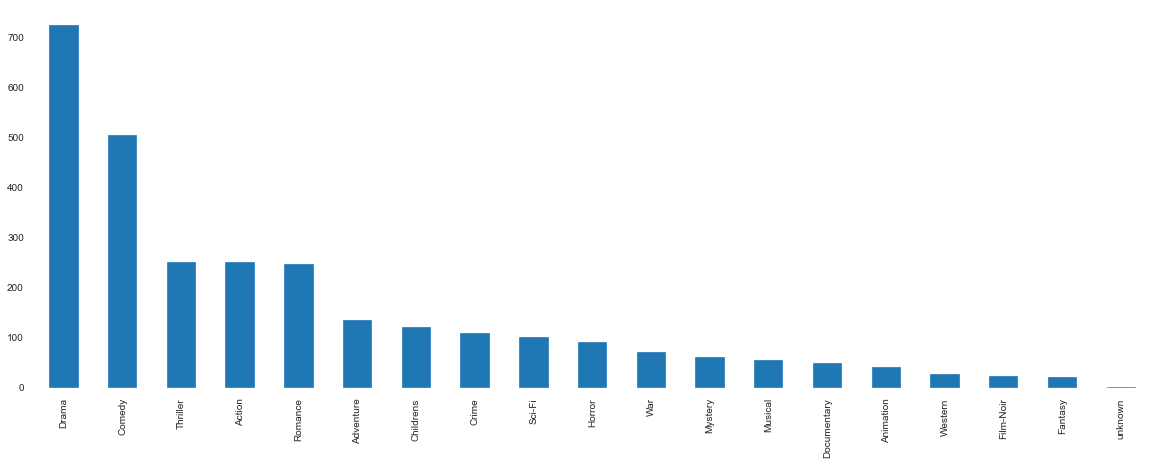

In [24]:
#Plot the above view using MatplotLib
plt.figure(figsize=(20,7))
item[['unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum(axis=0).sort_values(ascending=False).plot.bar()

**Insights:**



### 5. Drop the movie where the genre is unknown - 2.5 marks

In [25]:
# Check values to make sure if you want to drop it
item[item["unknown"]==1]

movie id          movie title release date  unknown  Action  Adventure  \
266        267              unknown          NaN        1       0          0   
1372      1373  Good Morning (1971)   4-Feb-1971        1       0          0   

      Animation  Childrens  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  \
266           0          0       0      0  ...        0          0       0   
1372          0          0       0      0  ...        0          0       0   

      Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
266         0        0        0       0         0    0        0  
1372        0        0        0       0         0    0        0  

[2 rows x 22 columns]

In [26]:
data[data["movie id"]==1373]

user id  movie id  rating  timestamp
8567      181      1373       1  878962052

In [27]:
#Drop row here
item = item[item['unknown']!=1]

#item.drop(1372,axis=0,inplace=True)

In [28]:
#Drop column here
item.drop('unknown',axis=1,inplace=True)

**Insights:**


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [29]:
item.head(5)

movie id        movie title release date  Action  Adventure  Animation  \
0         1   Toy Story (1995)  01-Jan-1995       0          0          1   
1         2   GoldenEye (1995)  01-Jan-1995       1          1          0   
2         3  Four Rooms (1995)  01-Jan-1995       0          0          0   
3         4  Get Shorty (1995)  01-Jan-1995       1          0          0   
4         5     Copycat (1995)  01-Jan-1995       0          0          0   

   Childrens  Comedy  Crime  Documentary  ...  Fantasy  Film-Noir  Horror  \
0          1       1      0            0  ...        0          0       0   
1          0       0      0            0  ...        0          0       0   
2          0       0      0            0  ...        0          0       0   
3          0       1      0            0  ...        0          0       0   
4          0       0      1            0  ...        0          0       0   

   Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
0        0        0        0       0         0    0        0  
1        0        0        0       0         1    0        0  
2        0        0        0       0         1    0        0  
3        0        0        0       0         0    0        0  
4        0        0        0       0         1    0        0  

[5 rows x 21 columns]

In [30]:
item.columns

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [31]:
#Get columns you need
df = item[["movie id","movie title"]].copy()
df.head(5)

movie id        movie title
0         1   Toy Story (1995)
1         2   GoldenEye (1995)
2         3  Four Rooms (1995)
3         4  Get Shorty (1995)
4         5     Copycat (1995)

In [32]:
# Calculate Number of Genres per movie id
df["Number of Genres"] = item[['Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western','movie title']].sum(axis=1)

In [33]:
#Filter the Number of Genres > 1 here
df[df["Number of Genres"]>1].sort_values(by="Number of Genres",ascending=False)

movie id                           movie title  Number of Genres
171        172       Empire Strikes Back, The (1980)                 6
559        560  Kid in King Arthur's Court, A (1995)                 6
425        426   Transformers: The Movie, The (1986)                 6
754        755                        Jumanji (1995)                 5
16          17            From Dusk Till Dawn (1996)                 5
...        ...                                   ...               ...
704        705            Singin' in the Rain (1952)                 2
708        709              Strictly Ballroom (1992)                 2
711        712                        Tin Men (1987)                 2
713        714                     Carrington (1995)                 2
1679      1680                  Sliding Doors (1998)                 2

[849 rows x 3 columns]

**Insights:**



### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

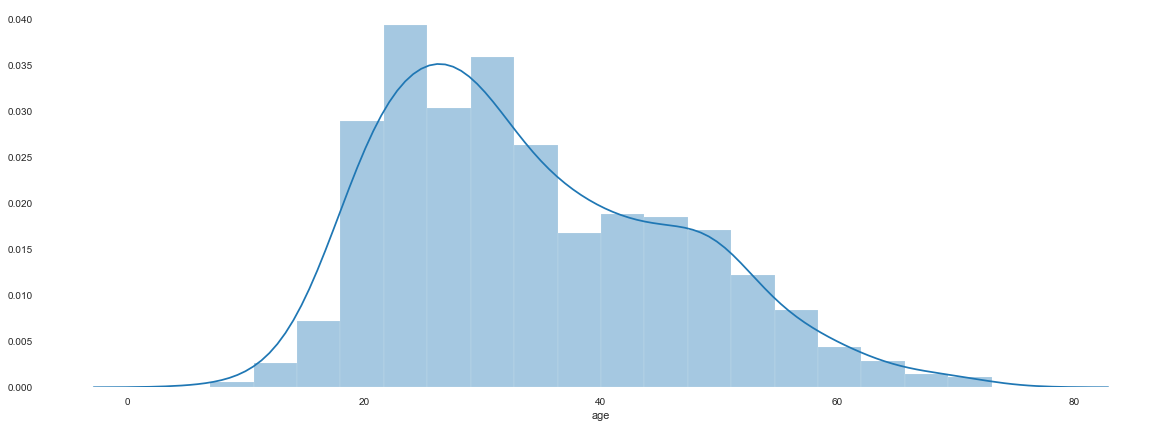

In [34]:
#Age distribution
plt.figure(figsize=(20,7))
sns.distplot(user["age"],kde=True)
#Qn - comment on skew . kurt ?

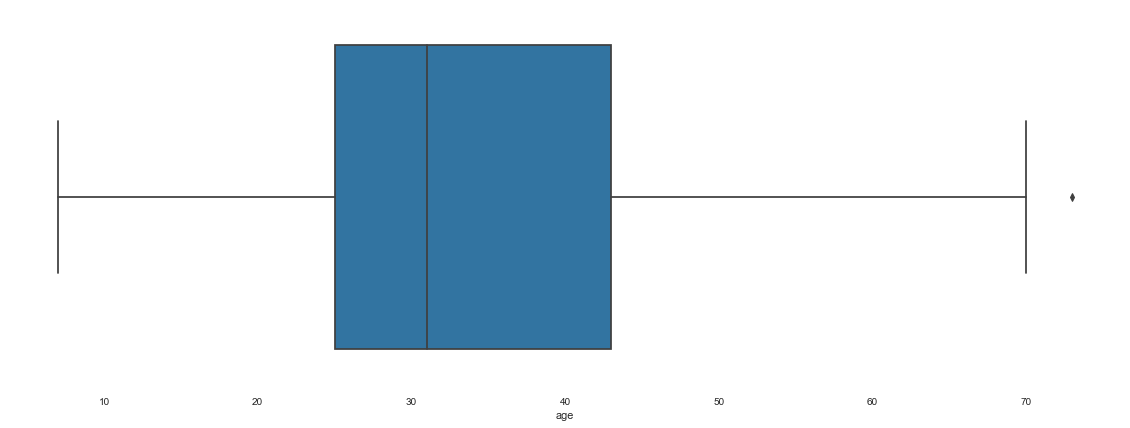

In [35]:
#Any other distribution to check skew/kurt
plt.figure(figsize=(20,7))
sns.boxplot(user["age"])

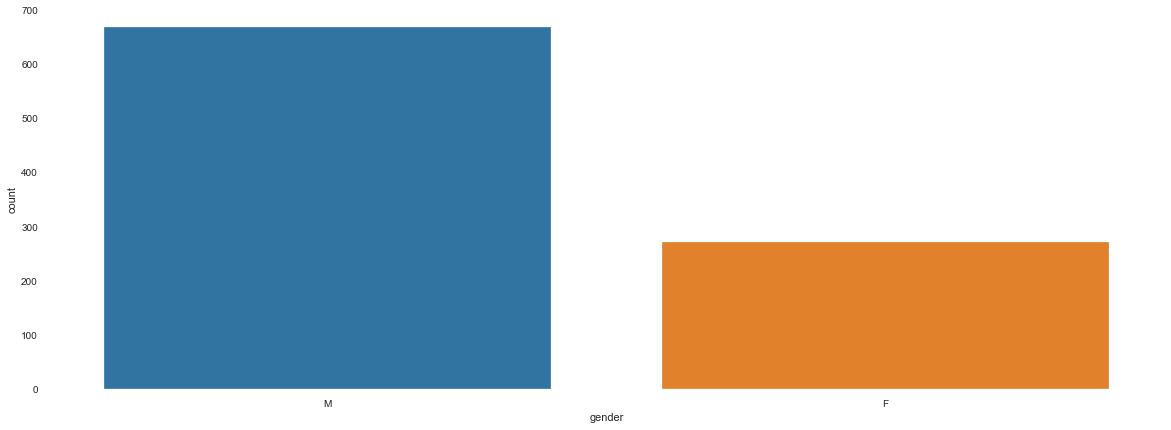

In [36]:
#Gender Distribution
plt.figure(figsize=(20,7))
sns.countplot(user["gender"])

In [37]:
user["gender"].value_counts()

M    670
F    273
Name: gender, dtype: int64

In [38]:
user.shape[0]

943

<Figure size 1440x504 with 0 Axes>

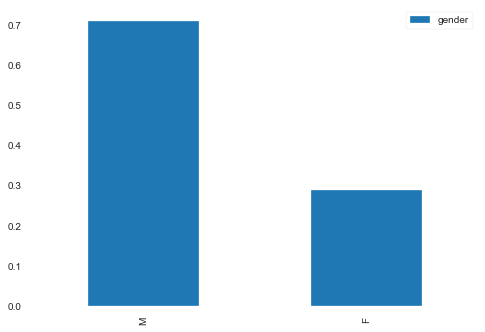

In [39]:
#Gender Frequency Distribution
plt.figure(figsize=(20,7))
pd.DataFrame(user["gender"].value_counts()/user.shape[0]).plot.bar()

Text(0, 0.5, 'Proportion')

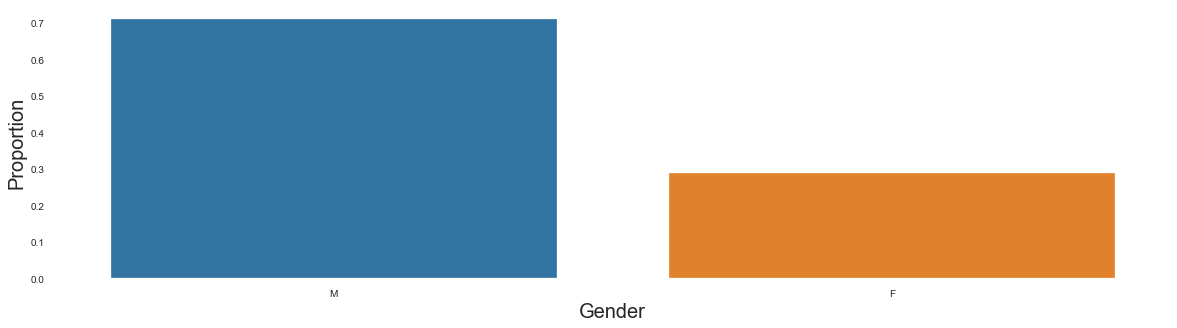

In [40]:
#Using SNS for Gender Frequency Distribution
df_bar = pd.DataFrame(user["gender"].value_counts()/user.shape[0])
df_bar.reset_index(inplace=True)
df_bar
plt.figure(figsize=(20,5))
sns.barplot(y="gender",x="index",data=df_bar)
plt.xlabel("Gender", fontsize=20)
plt.ylabel("Proportion", fontsize=20)

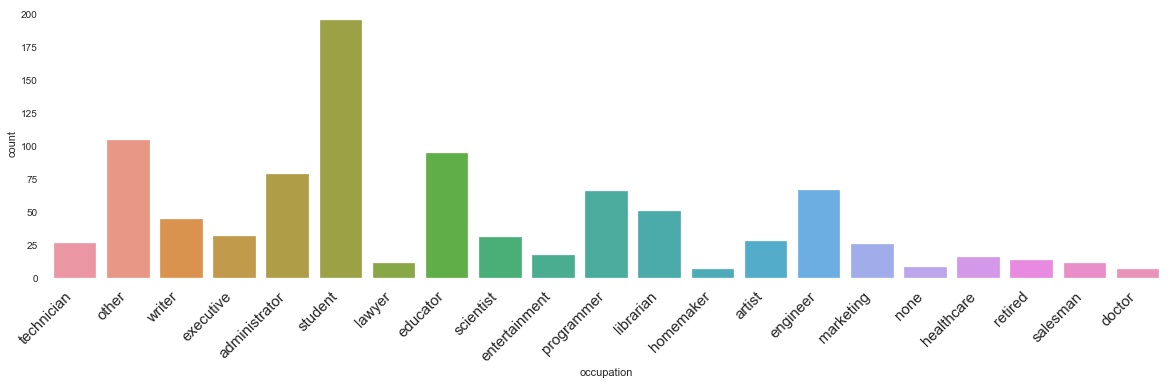

In [41]:
#Occupation Plot
plt.figure(figsize=(20,5))
sns.countplot(user["occupation"])
plt.xticks(rotation=45, horizontalalignment='right', fontsize=15);

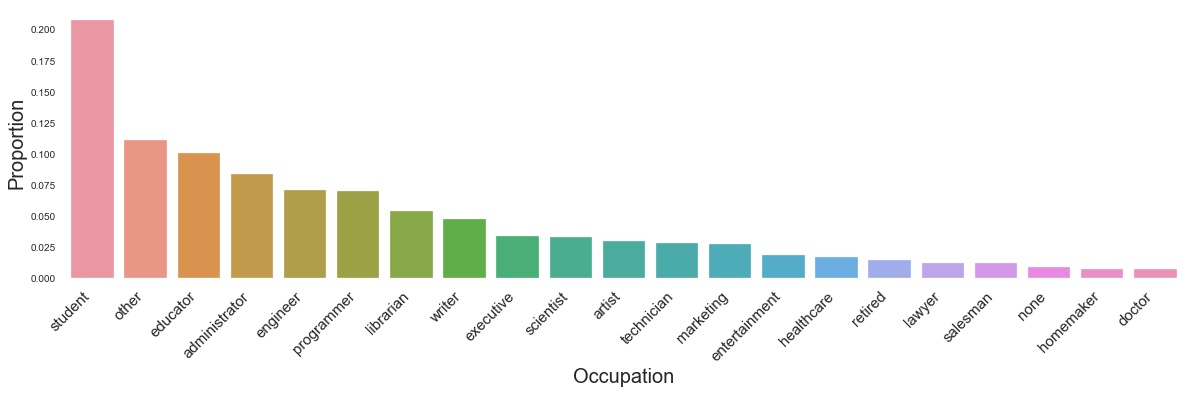

In [42]:
#Occupation Frequency Plot
df_occ_bar = pd.DataFrame(user["occupation"].value_counts()/user.shape[0])
df_occ_bar.reset_index(inplace=True)
df_occ_bar
plt.figure(figsize=(20,5))
sns.barplot(y="occupation",x="index",data=df_occ_bar)
plt.xlabel("Occupation", fontsize=20)
plt.ylabel("Proportion", fontsize=20)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=15);

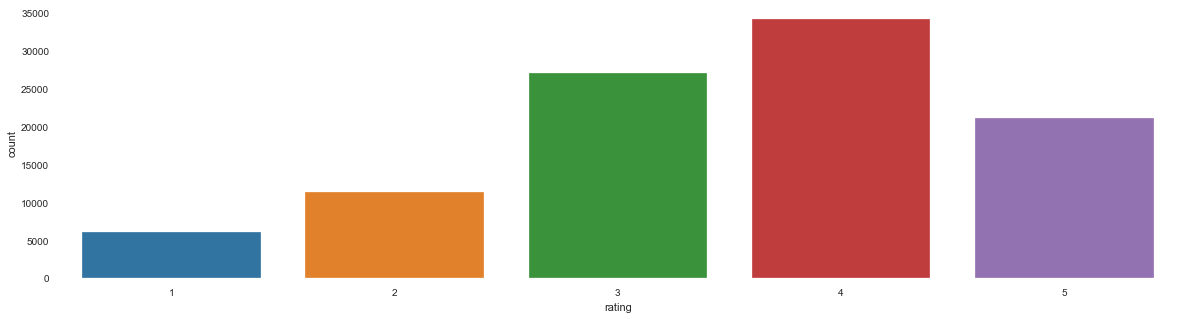

In [43]:
#Rating Plot
plt.figure(figsize=(20,5))
sns.countplot(data["rating"])

In [44]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [45]:
item["release date"].head(5)

0    01-Jan-1995
1    01-Jan-1995
2    01-Jan-1995
3    01-Jan-1995
4    01-Jan-1995
Name: release date, dtype: object

In [46]:
#Calculate Release Year - Multiple Ways using apply method below 
item["release year"] = item["release date"].apply(lambda x: int(x.split('-')[2]))

Text(0, 0.5, 'Frequency')

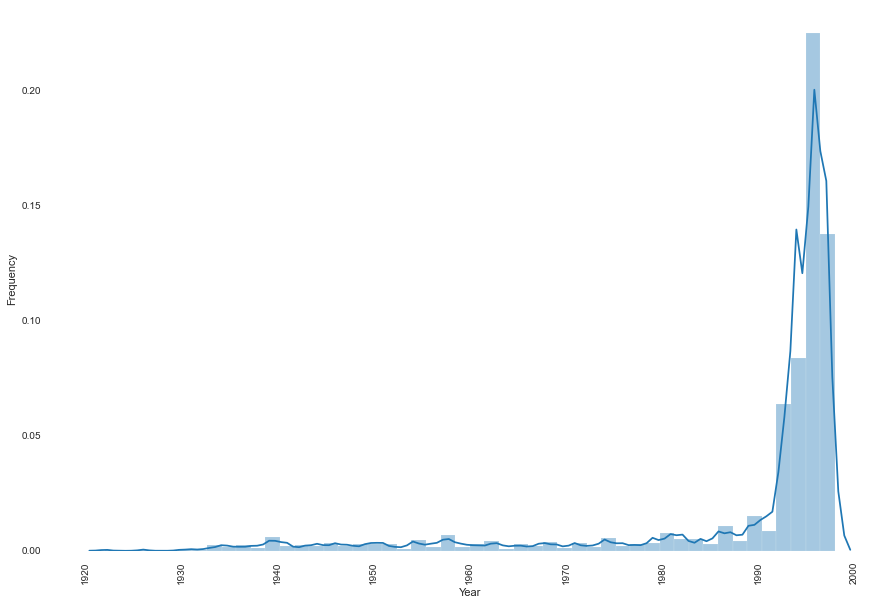

In [47]:
# Plot release year
plt.figure(figsize = (15,10))
sns.distplot(item['release year'])
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Frequency')

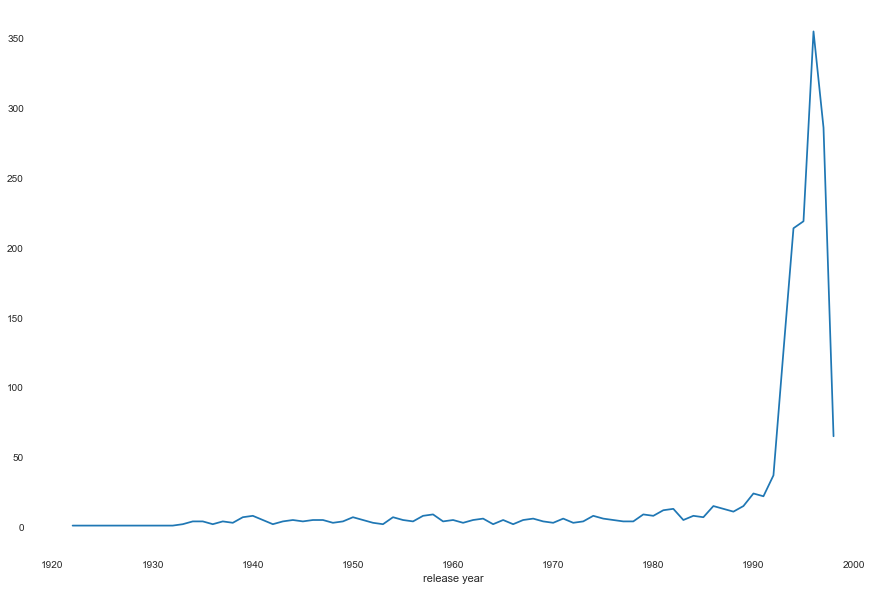

In [48]:
#Plot above graph using groupby
plt.figure(figsize = (15,10))
item.groupby('release year')['release year'].count().plot.line();

#### Plot sub plots using MATPLOT STYLE & provide paramters to graph using plt.

Functions used for MATLAB Style<br>
plt.xlim(left=,right=)<br>
plt.ylim(bottom=,top=)<br>
plt.xlabel('', fontsize = 15)<br>
plt.ylabel('', fontsize = 15)<br>
plt.title('', fontsize = 15)<br>
plt.xticks(fontsize = 10)<br>
plt.yticks(fontsize = 10)

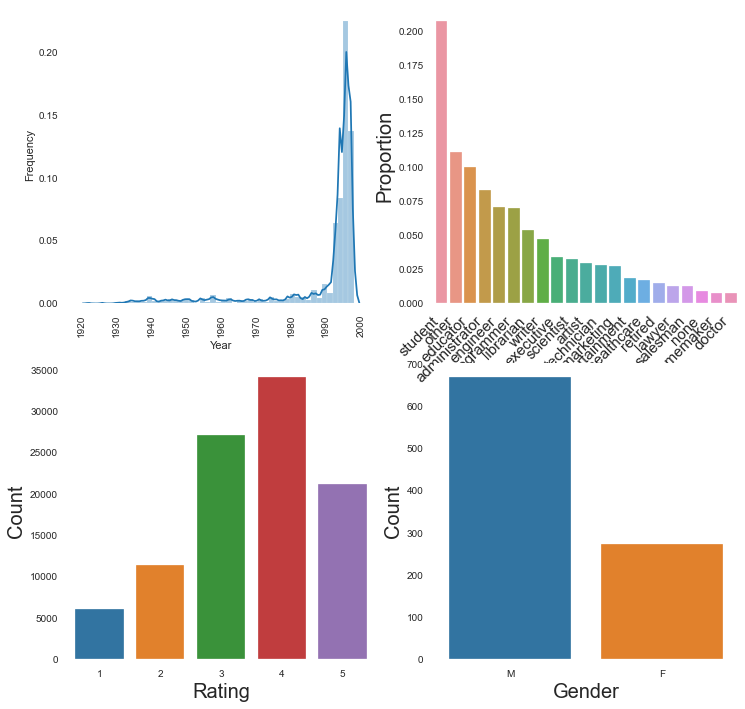

In [49]:
# Plot all the graphs together using subplot   - MATPLOT STYLE
plt.figure(figsize=(12,12))            
# Using subplots  
plt.subplot(2, 2, 1)
sns.distplot(item['release year'])
plt.xticks(rotation = 90)
plt.xlabel('Year')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.barplot(y="occupation",x="index",data=df_occ_bar)
plt.xlabel("Occupation", fontsize=20)
plt.ylabel("Proportion", fontsize=20)
plt.xticks(rotation=45, horizontalalignment='right', fontsize=15)

plt.subplot(2, 2, 3)
sns.countplot(data["rating"])
plt.xlabel("Rating", fontsize=20)
plt.ylabel("Count", fontsize=20)

plt.subplot(2, 2, 4)
sns.countplot(user["gender"])
plt.xlabel("Gender", fontsize=20)
plt.ylabel("Count", fontsize=20);






#### Plot sub plots using OBJECT ORIENTED STYLE & provide paramters to graph using ax.

Functions for Object Style<br>
axes.set_xlabel('', fontsize = 22);<br>
axes.set_ylabel('', fontsize = 22);<br>
axes.set_title('', fontsize = 22);<br>
axes.tick_params(axis = 'x', labelsize = 20)<br>
axes.tick_params(axis = 'y', labelsize = 20)<br>

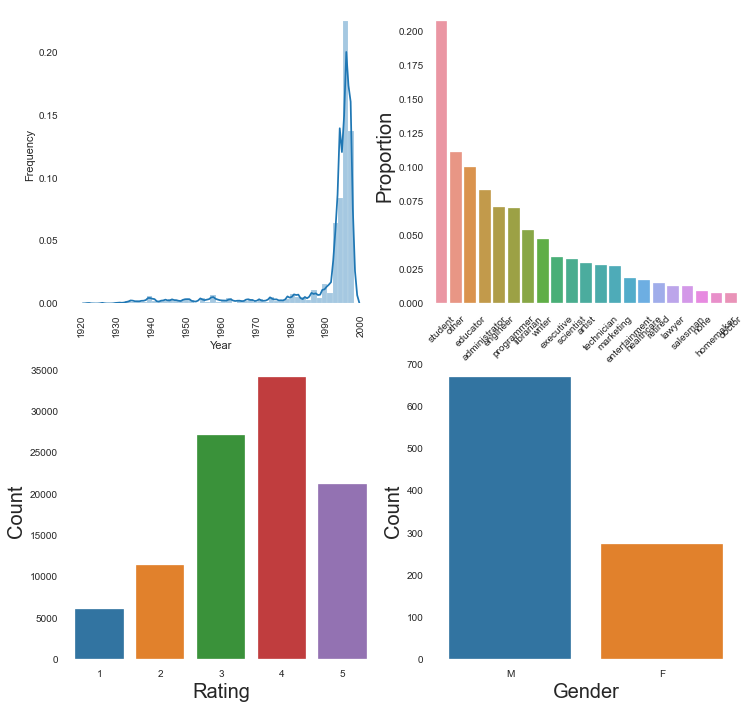

In [50]:
# Plot all the graphs together using subplot  - OBJECT ORIENTED STYLE
fig, ax = plt.subplots(nrows = 2 , ncols=2, figsize = (12, 12))             
# Using subplots with 3 columns so that all figure are plotting in one row 
sns.distplot(item['release year'],ax=ax[0,0])
ax[0,0].tick_params(axis = 'x',rotation = 90)
ax[0,0].set_xlabel('Year')
ax[0,0].set_ylabel('Frequency')

sns.barplot(y="occupation",x="index",data=df_occ_bar,ax=ax[0,1])
ax[0,1].set_xlabel("Occupation", fontsize=20)
ax[0,1].set_ylabel("Proportion", fontsize=20)
ax[0,1].tick_params(axis = 'x',rotation=45)

sns.countplot(data["rating"],ax=ax[1,0])
ax[1,0].set_xlabel("Rating", fontsize=20)
ax[1,0].set_ylabel("Count", fontsize=20)


sns.countplot(user["gender"],ax=ax[1,1])
ax[1,1].set_xlabel("Gender", fontsize=20)
ax[1,1].set_ylabel("Count", fontsize=20);




### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [51]:
#your code here
item.head(5)

movie id        movie title release date  Action  Adventure  Animation  \
0         1   Toy Story (1995)  01-Jan-1995       0          0          1   
1         2   GoldenEye (1995)  01-Jan-1995       1          1          0   
2         3  Four Rooms (1995)  01-Jan-1995       0          0          0   
3         4  Get Shorty (1995)  01-Jan-1995       1          0          0   
4         5     Copycat (1995)  01-Jan-1995       0          0          0   

   Childrens  Comedy  Crime  Documentary  ...  Film-Noir  Horror  Musical  \
0          1       1      0            0  ...          0       0        0   
1          0       0      0            0  ...          0       0        0   
2          0       0      0            0  ...          0       0        0   
3          0       1      0            0  ...          0       0        0   
4          0       0      1            0  ...          0       0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  release year  
0        0        0       0         0    0        0          1995  
1        0        0       0         1    0        0          1995  
2        0        0       0         1    0        0          1995  
3        0        0       0         0    0        0          1995  
4        0        0       0         1    0        0          1995  

[5 rows x 22 columns]

In [52]:
# take a copy of original dataframe
item_year = item.copy()

In [53]:
# Remove columns i dont need
item_year.drop(["movie id","movie title","release date"],axis=1,inplace=True)

In [54]:
# Releases each year by Genre
item_relyear_genre = item_year.groupby("release year").sum()
item_relyear_genre.head(5)

Action  Adventure  Animation  Childrens  Comedy  Crime  \
release year                                                           
1922               0          0          0          0       0      0   
1926               0          0          0          0       0      0   
1930               0          0          0          0       0      0   
1931               0          0          0          0       0      1   
1932               0          0          0          0       0      0   

              Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  \
release year                                                            
1922                    0      0        0          0       1        0   
1926                    0      1        0          0       0        0   
1930                    0      1        0          0       0        0   
1931                    0      0        0          1       0        0   
1932                    0      0        0          0       0        0   

              Mystery  Romance  Sci-Fi  Thriller  War  Western  
release year                                                    
1922                0        0       0         0    0        0  
1926                0        0       0         0    0        0  
1930                0        0       0         0    0        0  
1931                0        0       0         1    0        0  
1932                0        1       0         0    1        0

In [55]:
# Releases each year using the dataframe above
item_relyear = pd.DataFrame(item_relyear_genre.sum(axis=1))
item_relyear.columns = ["Movies"]
item_relyear

Movies
release year        
1922               1
1926               1
1930               1
1931               3
1932               2
...              ...
1994             353
1995             381
1996             559
1997             496
1998             117

[71 rows x 1 columns]

In [56]:
# Get Percentage of Genre released each year by using div function
df_rel_year = (item_relyear_genre.div(item_relyear['Movies'], axis= 0) * 100)
df_rel_year.sort_index(inplace=True)
df_rel_year.head(5)

Action  Adventure  Animation  Childrens  Comedy      Crime  \
release year                                                               
1922             0.0        0.0        0.0        0.0     0.0   0.000000   
1926             0.0        0.0        0.0        0.0     0.0   0.000000   
1930             0.0        0.0        0.0        0.0     0.0   0.000000   
1931             0.0        0.0        0.0        0.0     0.0  33.333333   
1932             0.0        0.0        0.0        0.0     0.0   0.000000   

              Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  \
release year                                                            
1922                  0.0    0.0      0.0   0.000000   100.0      0.0   
1926                  0.0  100.0      0.0   0.000000     0.0      0.0   
1930                  0.0  100.0      0.0   0.000000     0.0      0.0   
1931                  0.0    0.0      0.0  33.333333     0.0      0.0   
1932                  0.0    0.0      0.0   0.000000     0.0      0.0   

              Mystery  Romance  Sci-Fi   Thriller   War  Western  
release year                                                      
1922              0.0      0.0     0.0   0.000000   0.0      0.0  
1926              0.0      0.0     0.0   0.000000   0.0      0.0  
1930              0.0      0.0     0.0   0.000000   0.0      0.0  
1931              0.0      0.0     0.0  33.333333   0.0      0.0  
1932              0.0     50.0     0.0   0.000000  50.0      0.0

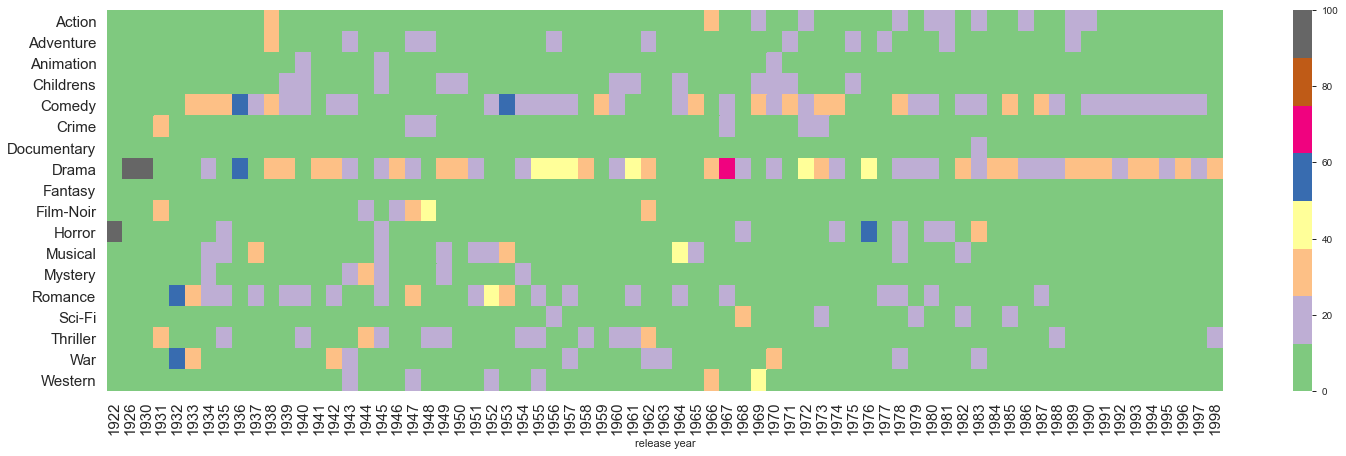

In [57]:
#Plot genre using heatmap
plt.figure(figsize=(25,7))  #setting the figure size
sns.heatmap(df_rel_year.T, cmap='Accent')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15);

**Insights:**



### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [58]:
data.head()

user id  movie id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596

In [59]:
#Group ratings by mean and average
data_rating = pd.DataFrame(data.groupby("movie id").agg({'rating':['mean','count']}))
data_rating.columns = ["Ratings Mean","Ratings Count"]
data_rating.head(5)

Ratings Mean  Ratings Count
movie id                             
1             3.878319            452
2             3.206107            131
3             3.033333             90
4             3.550239            209
5             3.302326             86

In [60]:
## Filter ratings more than 100
data_top25 = data_rating[data_rating["Ratings Count"]>100]
data_top25.reset_index(inplace=True)
data_top25

movie id  Ratings Mean  Ratings Count
0           1      3.878319            452
1           2      3.206107            131
2           4      3.550239            209
3           7      3.798469            392
4           8      3.995434            219
..        ...           ...            ...
329       926      2.702970            101
330       928      3.115385            104
331      1016      3.459854            137
332      1028      3.040541            148
333      1047      2.835821            134

[334 rows x 3 columns]

In [61]:
# Get Movie Title with rest of the details
item[["movie id","movie title"]]

movie id                                movie title
0            1                           Toy Story (1995)
1            2                           GoldenEye (1995)
2            3                          Four Rooms (1995)
3            4                          Get Shorty (1995)
4            5                             Copycat (1995)
...        ...                                        ...
1677      1678                          Mat' i syn (1997)
1678      1679                           B. Monkey (1998)
1679      1680                       Sliding Doors (1998)
1680      1681                        You So Crazy (1994)
1681      1682  Scream of Stone (Schrei aus Stein) (1991)

[1680 rows x 2 columns]

In [62]:
#merge to get title
pd.merge(item[["movie id","movie title"]],data_top25,on="movie id",how="left").sort_values(by="Ratings Mean",ascending=False).head(25)

movie id                                        movie title  \
406       408                              Close Shave, A (1995)   
316       318                            Schindler's List (1993)   
168       169                         Wrong Trousers, The (1993)   
481       483                                  Casablanca (1942)   
63         64                   Shawshank Redemption, The (1994)   
601       603                                 Rear Window (1954)   
11         12                         Usual Suspects, The (1995)   
49         50                                   Star Wars (1977)   
177       178                                12 Angry Men (1957)   
133       134                                Citizen Kane (1941)   
425       427                       To Kill a Mockingbird (1962)   
355       357             One Flew Over the Cuckoo's Nest (1975)   
97         98                   Silence of the Lambs, The (1991)   
478       480                          North by Northwest (1959)   
126       127                              Godfather, The (1972)   
283       285                              Secrets & Lies (1996)   
270       272                           Good Will Hunting (1997)   
655       657                   Manchurian Candidate, The (1962)   
472       474  Dr. Strangelove or: How I Learned to Stop Worr...   
173       174                     Raiders of the Lost Ark (1981)   
477       479                                     Vertigo (1958)   
311       313                                     Titanic (1997)   
509       511                          Lawrence of Arabia (1962)   
482       484                         Maltese Falcon, The (1941)   
171       172                    Empire Strikes Back, The (1980)   

     Ratings Mean  Ratings Count  
406      4.491071          112.0  
316      4.466443          298.0  
168      4.466102          118.0  
481      4.456790          243.0  
63       4.445230          283.0  
601      4.387560          209.0  
11       4.385768          267.0  
49       4.358491          583.0  
177      4.344000          125.0  
133      4.292929          198.0  
425      4.292237          219.0  
355      4.291667          264.0  
97       4.289744          390.0  
478      4.284916          179.0  
126      4.283293          413.0  
283      4.265432          162.0  
270      4.262626          198.0  
655      4.259542          131.0  
472      4.252577          194.0  
173      4.252381          420.0  
477      4.251397          179.0  
311      4.245714          350.0  
509      4.231214          173.0  
482      4.210145          138.0  
171      4.204360          367.0

### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [63]:
print(data.head(2))
print(item.head(2))
print(user.head(2))

   user id  movie id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
   movie id       movie title release date  Action  Adventure  Animation  \
0         1  Toy Story (1995)  01-Jan-1995       0          0          1   
1         2  GoldenEye (1995)  01-Jan-1995       1          1          0   

   Childrens  Comedy  Crime  Documentary  ...  Film-Noir  Horror  Musical  \
0          1       1      0            0  ...          0       0        0   
1          0       0      0            0  ...          0       0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  release year  
0        0        0       0         0    0        0          1995  
1        0        0       0         1    0        0          1995  

[2 rows x 22 columns]
   user id  age gender  occupation zip code
0        1   24      M  technician    85711
1        2   53      F       other    94043


In [64]:
#Merge All the Data Sets together
df_merge = pd.merge(pd.merge(data,item,on='movie id'),user,on='user id')

In [65]:
df_merge.head(5)

user id  movie id  rating  timestamp  \
0      196       242       3  881250949   
1      196       257       2  881251577   
2      196       111       4  881251793   
3      196        25       4  881251955   
4      196       382       4  881251843   

                                         movie title release date  Action  \
0                                       Kolya (1996)  24-Jan-1997       0   
1                                Men in Black (1997)  04-Jul-1997       1   
2                Truth About Cats & Dogs, The (1996)  26-Apr-1996       0   
3                               Birdcage, The (1996)  08-Mar-1996       0   
4  Adventures of Priscilla, Queen of the Desert, ...  01-Jan-1994       0   

   Adventure  Animation  Childrens  ...  Romance  Sci-Fi  Thriller  War  \
0          0          0          0  ...        0       0         0    0   
1          1          0          0  ...        0       1         0    0   
2          0          0          0  ...        1       0         0    0   
3          0          0          0  ...        0       0         0    0   
4          0          0          0  ...        0       0         0    0   

   Western  release year  age  gender  occupation  zip code  
0        0          1997   49       M      writer     55105  
1        0          1997   49       M      writer     55105  
2        0          1996   49       M      writer     55105  
3        0          1996   49       M      writer     55105  
4        0          1994   49       M      writer     55105  

[5 rows x 29 columns]

In [66]:
df_merge.columns

Index(['user id', 'movie id', 'rating', 'timestamp', 'movie title',
       'release date', 'Action', 'Adventure', 'Animation', 'Childrens',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'release year', 'age', 'gender', 'occupation', 'zip code'],
      dtype='object')

##### Below example is a long dataset where columns are pivoted to rows using melt function available for pandas

In [67]:
# Long vs Wide dataset
occ_gender = df_merge.melt(id_vars=['user id', 'movie id', 'rating', 'movie title',
            'release year', 'age', 'gender', 'occupation', 'zip code'],
              value_vars=['Action', 'Adventure', 'Animation', 'Childrens',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
              var_name=['Genre'],
              value_name='genre_value')

occ_gender = occ_gender[occ_gender['genre_value']>0]
occ_gender.head(5)



user id  movie id  rating                      movie title  release year  \
1       196       257       2              Men in Black (1997)          1997   
10      196       173       2       Princess Bride, The (1987)          1987   
25      196       110       1      Operation Dumbo Drop (1995)          1995   
41       63       257       3              Men in Black (1997)          1997   
42       63       222       3  Star Trek: First Contact (1996)          1996   

    age gender occupation zip code   Genre  genre_value  
1    49      M     writer    55105  Action            1  
10   49      M     writer    55105  Action            1  
25   49      M     writer    55105  Action            1  
41   31      M  marketing    75240  Action            1  
42   31      M  marketing    75240  Action            1

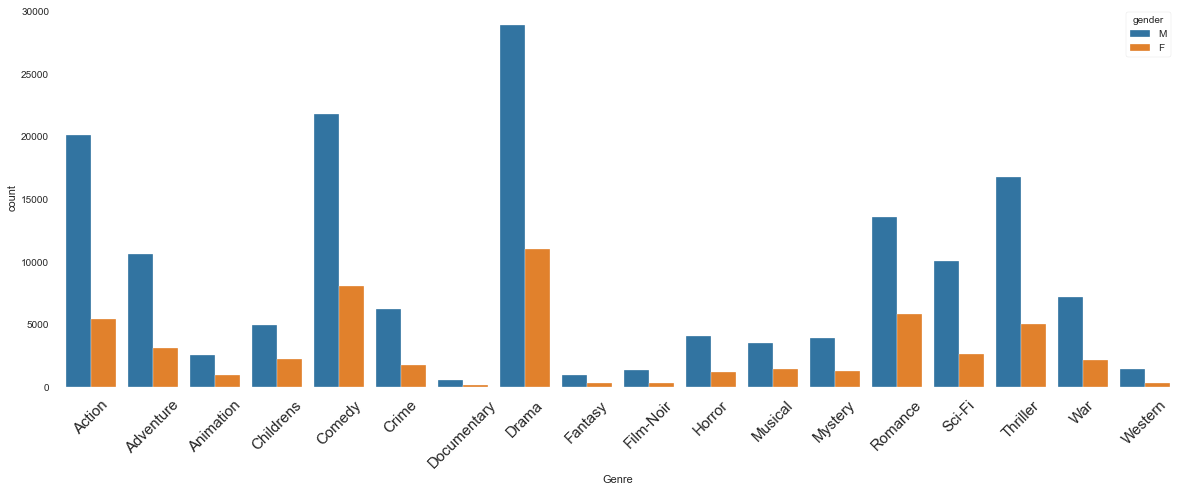

In [68]:
plt.figure(figsize=(20,7))
sns.countplot(x='Genre',data=occ_gender,hue='gender')
plt.xticks(fontsize=15,rotation=45);
# This proves Hypothesis to be true but cannot use as this is an imbalonced dataset with more men responding than women

In [69]:
# Alternatively, calculate % of men / women watch different genre
gg = df_merge.groupby('gender').sum().loc[:,'Action':'Western']
gg.head(5)

Action  Adventure  Animation  Childrens  Comedy  Crime  Documentary  \
gender                                                                        
F         5442       3141        995       2232    8068   1794          187   
M        20147      10612       2610       4950   21764   6261          571   

        Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  \
gender                                                                         
F       11008      363        385    1197     1442     1314     5858    2629   
M       28887      989       1348    4120     3512     3931    13603   10101   

        Thriller   War  Western  
gender                           
F           5086  2189      371  
M          16786  7209     1483

In [70]:
gg['total'] = gg.sum(axis=1)
gg.head(5)

Action  Adventure  Animation  Childrens  Comedy  Crime  Documentary  \
gender                                                                        
F         5442       3141        995       2232    8068   1794          187   
M        20147      10612       2610       4950   21764   6261          571   

        Drama  Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  \
gender                                                                         
F       11008      363        385    1197     1442     1314     5858    2629   
M       28887      989       1348    4120     3512     3931    13603   10101   

        Thriller   War  Western   total  
gender                                   
F           5086  2189      371   53701  
M          16786  7209     1483  158884

In [71]:
# Dataframe for Men & Women with % of total for different genre
gg_df = gg.div(gg.total,axis=0)* 100
gg_df.drop("total",axis=1,inplace=True)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

<Figure size 1800x1800 with 0 Axes>

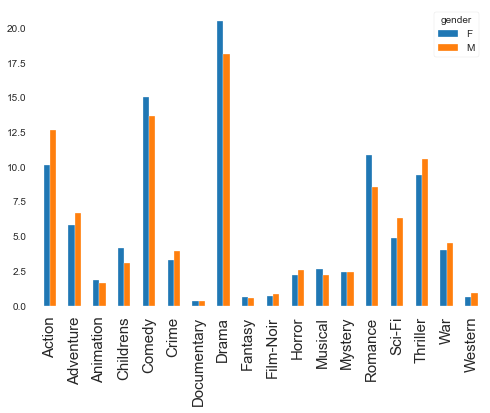

In [72]:
plt.figure(figsize=(25,25))
gg_df.T.plot.bar()
plt.xticks(fontsize=15)
# This proves our Hypothesis to be false

###### Compare validity based on ratings

In [73]:
df_merge.head(5)

user id  movie id  rating  timestamp  \
0      196       242       3  881250949   
1      196       257       2  881251577   
2      196       111       4  881251793   
3      196        25       4  881251955   
4      196       382       4  881251843   

                                         movie title release date  Action  \
0                                       Kolya (1996)  24-Jan-1997       0   
1                                Men in Black (1997)  04-Jul-1997       1   
2                Truth About Cats & Dogs, The (1996)  26-Apr-1996       0   
3                               Birdcage, The (1996)  08-Mar-1996       0   
4  Adventures of Priscilla, Queen of the Desert, ...  01-Jan-1994       0   

   Adventure  Animation  Childrens  ...  Romance  Sci-Fi  Thriller  War  \
0          0          0          0  ...        0       0         0    0   
1          1          0          0  ...        0       1         0    0   
2          0          0          0  ...        1       0         0    0   
3          0          0          0  ...        0       0         0    0   
4          0          0          0  ...        0       0         0    0   

   Western  release year  age  gender  occupation  zip code  
0        0          1997   49       M      writer     55105  
1        0          1997   49       M      writer     55105  
2        0          1996   49       M      writer     55105  
3        0          1996   49       M      writer     55105  
4        0          1994   49       M      writer     55105  

[5 rows x 29 columns]

In [74]:
# Men watch more drama then women
# Numerator checks for sum of ratings for each gender for all Drama Movies
# Denominator checks for sum of ratings for each gender
(df_merge[df_merge["Drama"]==1].groupby("gender")["rating"].sum() / df_merge.groupby("gender")["rating"].sum()) * 100
# Our hypothesis is not proved using ratings as well.

gender
F    44.352763
M    40.751736
Name: rating, dtype: float64

In [75]:
#Women watch more Sci-Fi than men
# Numerator checks for sum of ratings for each gender for all Sci-Fi Movies
# Denominator checks for sum of ratings for each gender
(df_merge[df_merge["Sci-Fi"]==1].groupby("gender")["rating"].sum() / df_merge.groupby("gender")["rating"].sum()) * 100
# Our hypothesis is not proved using ratings as well.

gender
F    10.117279
M    13.787682
Name: rating, dtype: float64

In [76]:
#Men watch more Romance than women
# Numerator checks for sum of ratings for each gender for all Romance Movies
# Denominator checks for sum of ratings for each gender
(df_merge[df_merge["Romance"]==1].groupby("gender")["rating"].sum() / df_merge.groupby("gender")["rating"].sum()) * 100
# Our hypothesis is not proved using ratings as well.

gender
F    23.560411
M    18.723575
Name: rating, dtype: float64

In [77]:
# Run Pandas Profiling on the dataset
prof = ProfileReport(df_merge)
prof


**Conclusion:**
    
Our Hypothesis arent proved using the dataset provided